# Experiment 1 - Network growth

### Read the data from csv

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv
df = pd.read_csv("data/exp1_network_growth_data.csv")

print("Experiment data analysis - Network growth")
print("Number of samples:", df["n_sample"].max())
print("Number of RDDs by sample:", df["n_network"].max())
print("Range of RDDs:", df["n_rdds"].min(),"-", df["n_rdds"].max())

df.head(20)

Experiment data analysis - Network growth
Number of samples: 500
Number of RDDs by sample: 8
Range of RDDs: 3 - 10


,n_sample,n_network,n_rdds,n_rdda_attractors,t_find_attractors_method,n_pair_attractors,t_comp_paris_method,n_attractor_fields,t_optimized_method
0,1,1,3,21,2.565898,122,0.064210,2,0.040226
1,1,2,4,40,0.559731,374,0.112972,34,0.395293
2,1,3,5,69,0.830559,824,0.230633,39,2.587968
3,1,4,6,42,1.777308,249,0.075509,10,0.163224
4,1,5,7,76,1.046397,710,0.180637,114,1.984773
5,1,6,8,70,1.086547,562,0.170090,197,26.998225
6,1,7,9,100,1.941139,924,0.266208,0,0.041056
7,1,8,10,130,1.654757,1136,0.329225,8208,1848.622226
8,2,1,3,34,0.720323,348,0.090616,13,0.086795
9,2,2,4,37,0.845797,321,0.085191,20,0.247564


In [46]:
# Time of Experiment (in seg) 437589.64926457405
# Time of Experiment (in hours, minutes and seconds) 01:33:09
import time

time_experiment = df[['t_find_attractors_method','t_optimized_method','t_comp_paris_method']].sum().sum()
time_format = time.strftime("%H:%M:%S", time.gmtime(time_experiment))
print("Time experiment (seg.):",time_experiment)
print("Time experiment (hh:mm:ss):",time_format)

Time experiment (seg.): 437555.89047408104
Time experiment (hh:mm:ss): 01:32:35


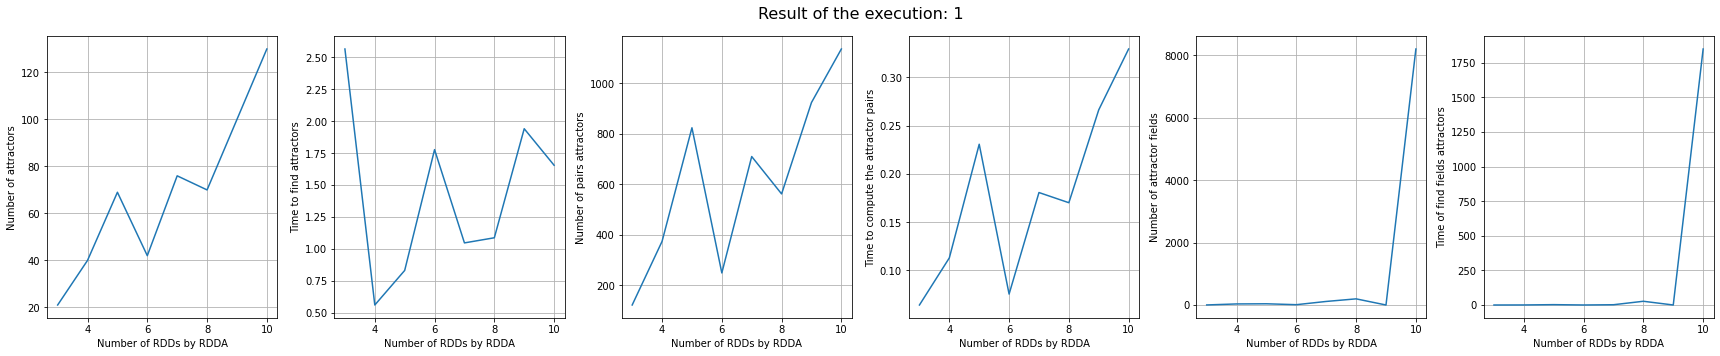

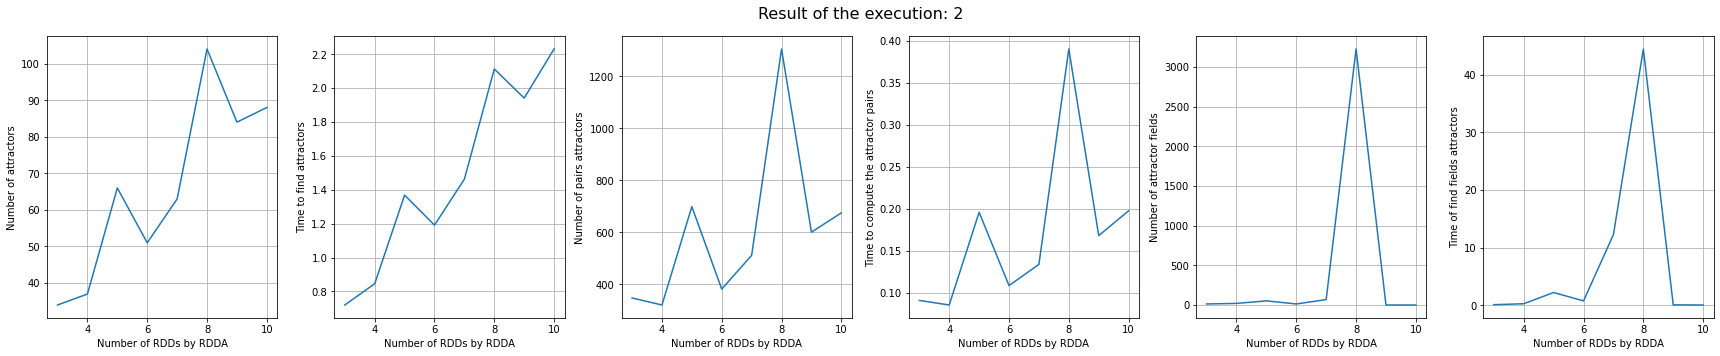

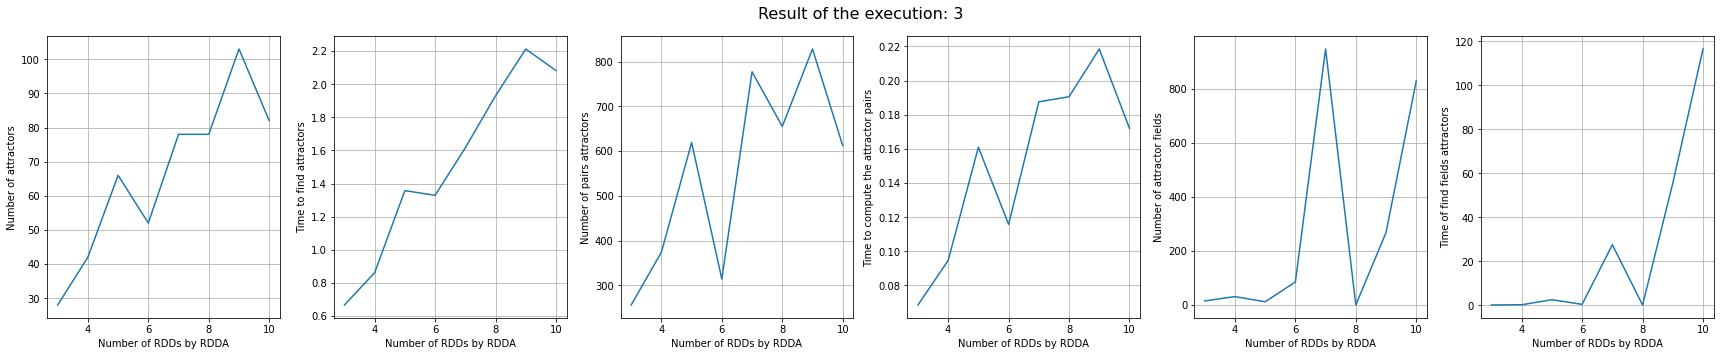

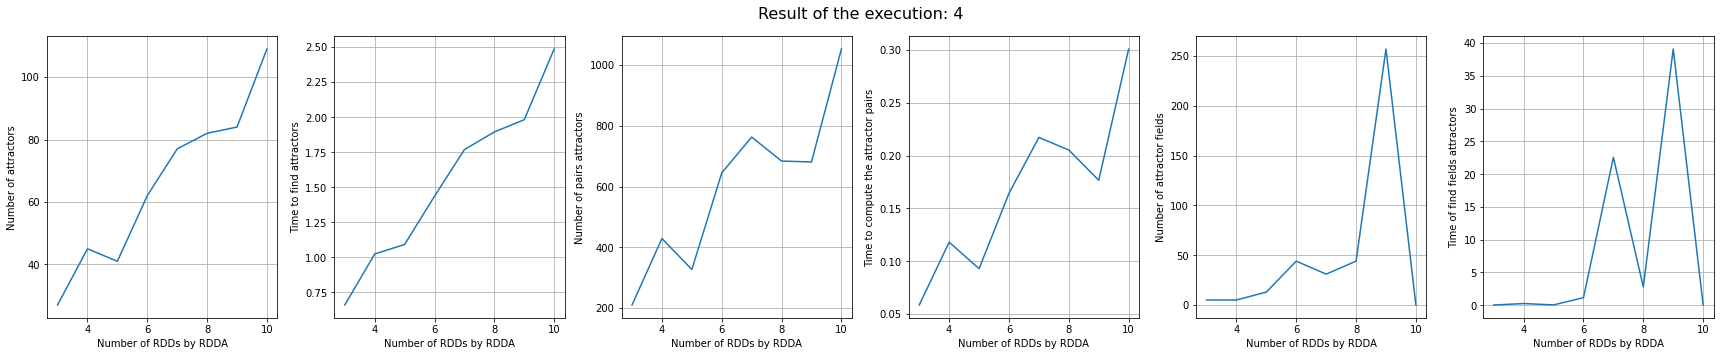

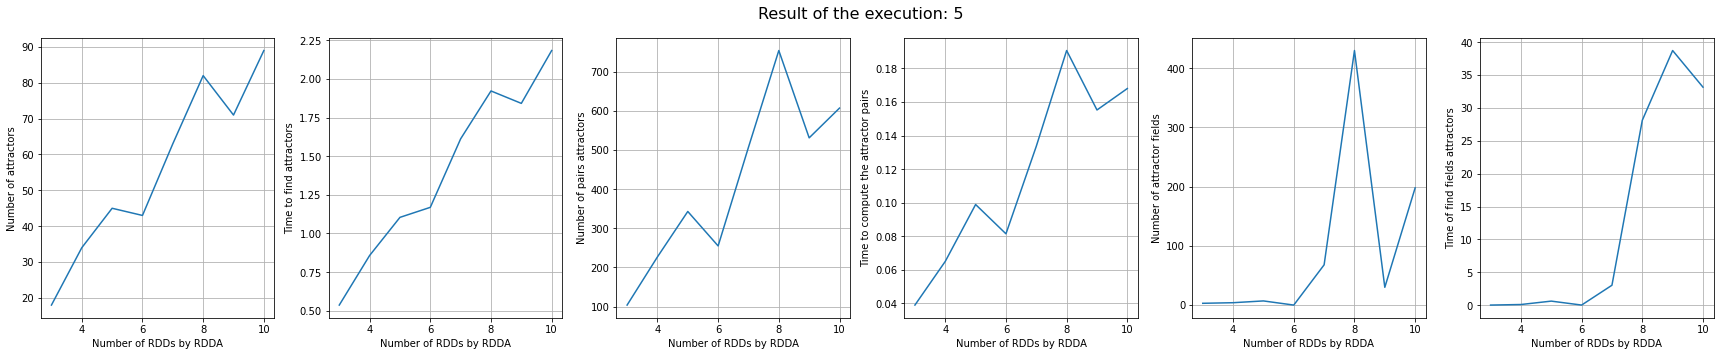

In [47]:
l_labels_y = ["Number of attractors", "Time to find attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor fields", "Time of find fields attractors"]

grouped = df.groupby("n_sample")
labels = {key:label for key, label in zip(df.keys()[3:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}

for number in np.array(list(grouped.groups.keys()))[:5]:
    group = grouped.get_group(number)
    fig_, axs = plt.subplots(1,6,figsize=(24,5))
    for (ax, key) in zip(axs, group.keys()[3:]):
        ax.plot(group['n_rdds'], group[key])
        ax.set_xlabel('Number of RDDs by RDDA')
        ax.set_ylabel(labels[key])
        ax.grid(True)
    fig_.suptitle('Result of the execution: ' + str(number), fontsize=16)
    fig_.tight_layout()

### Boxplot for every indicator - General vision

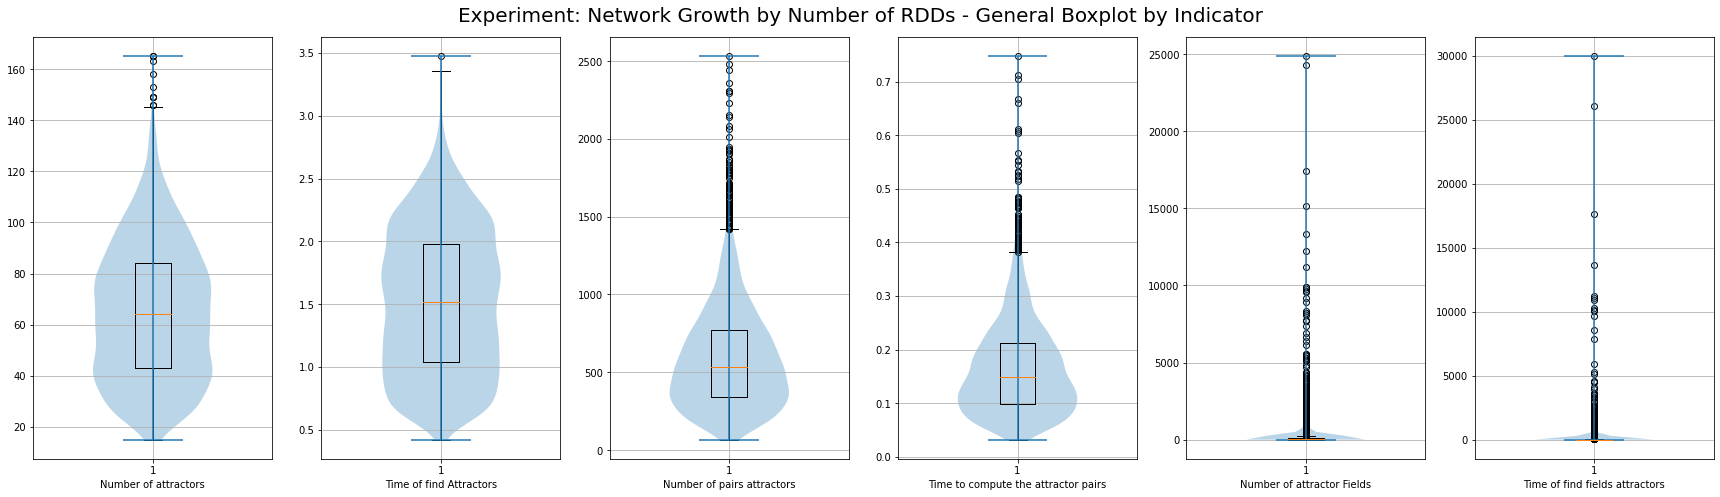

In [48]:
# General Boxplot by Indicator
l_labels_y = ["Number of attractors", "Time of find Attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor Fields", "Time of find fields attractors"]

fig_, axs = plt.subplots(1,6,figsize=(24,7))
cont_label = 0
for (key,ax) in zip(df.keys()[3:], axs):
    ax.boxplot(df[key])
    ax.violinplot(df[key])
    ax.set_xlabel(l_labels_y[cont_label])
    ax.grid(True)
    cont_label += 1
fig_.suptitle('Experiment: Network Growth by Number of RDDs - General Boxplot by Indicator', fontsize=20)
fig_.tight_layout()

### Boxplot for every Indicator - Indicator across all the samples for every number of RDDs

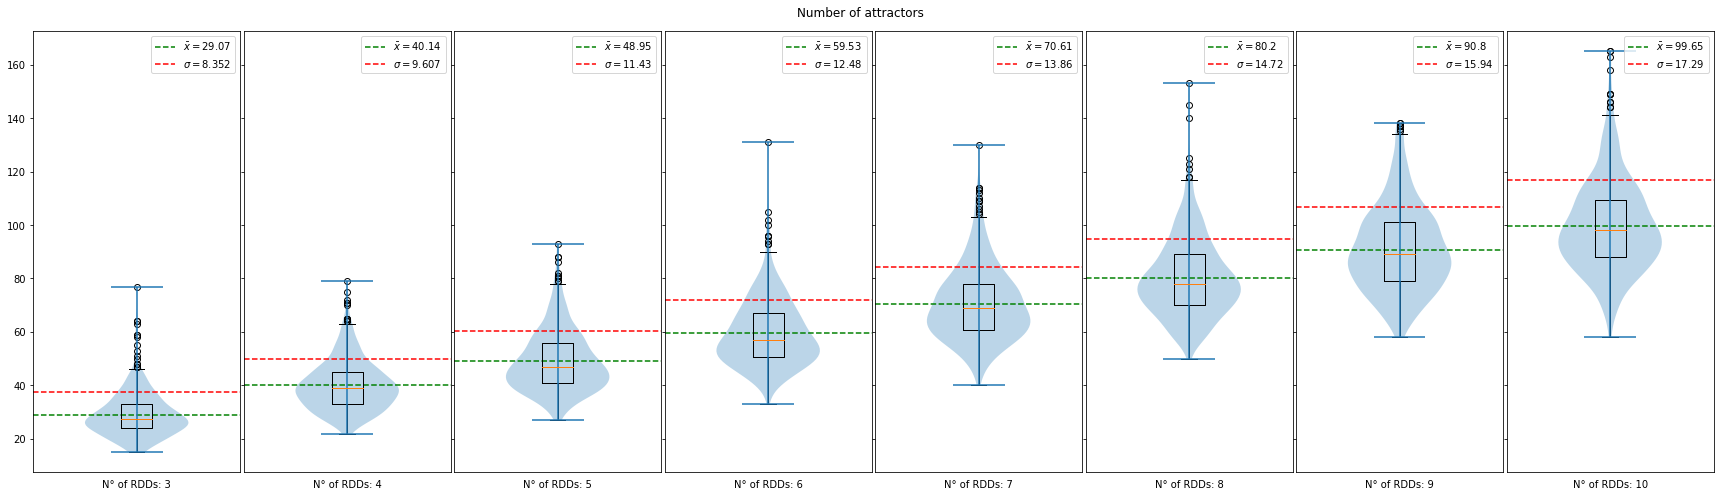

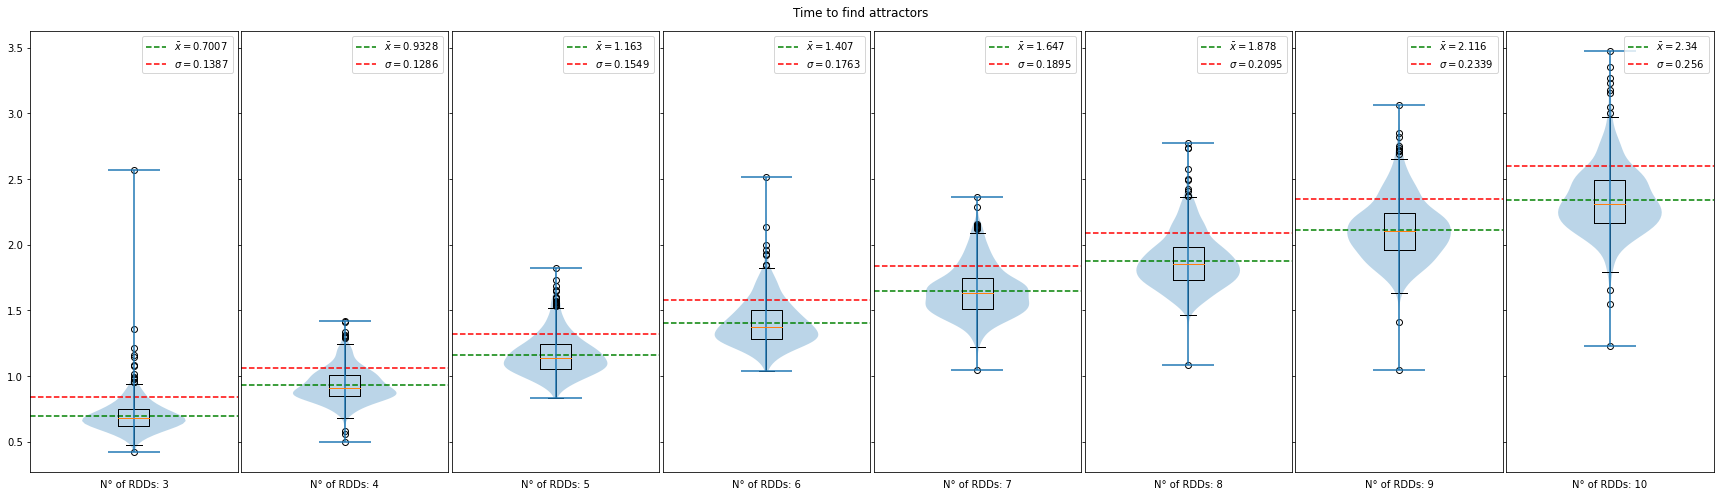

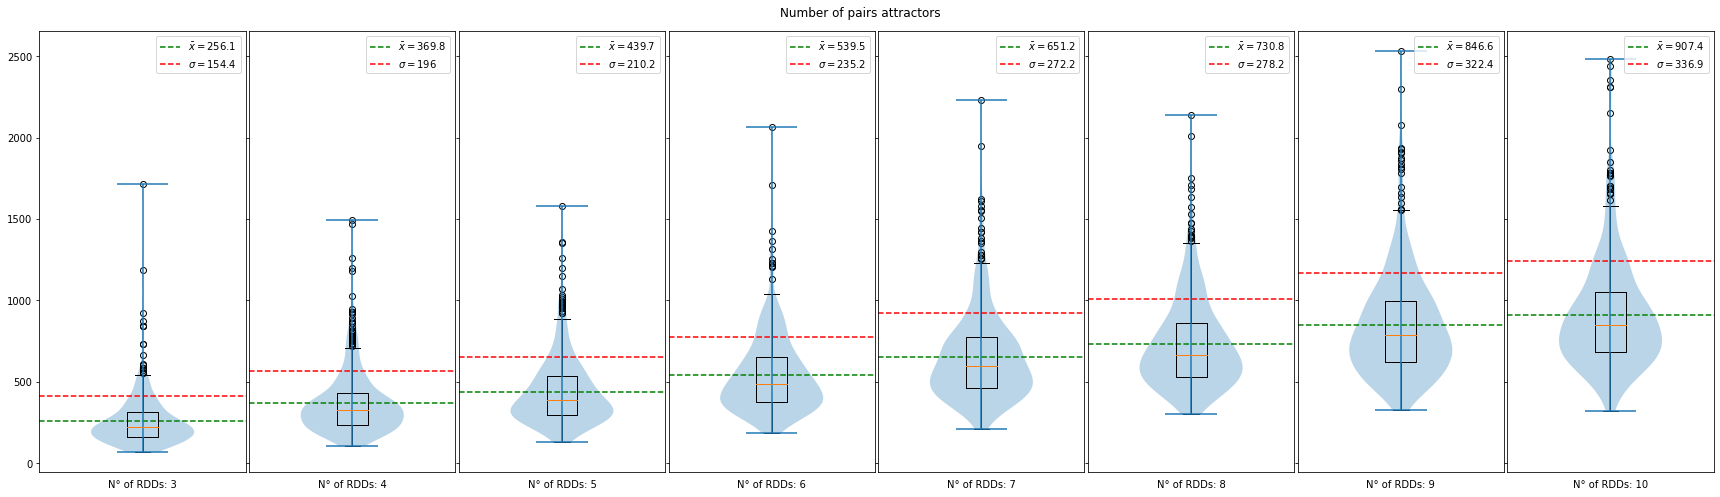

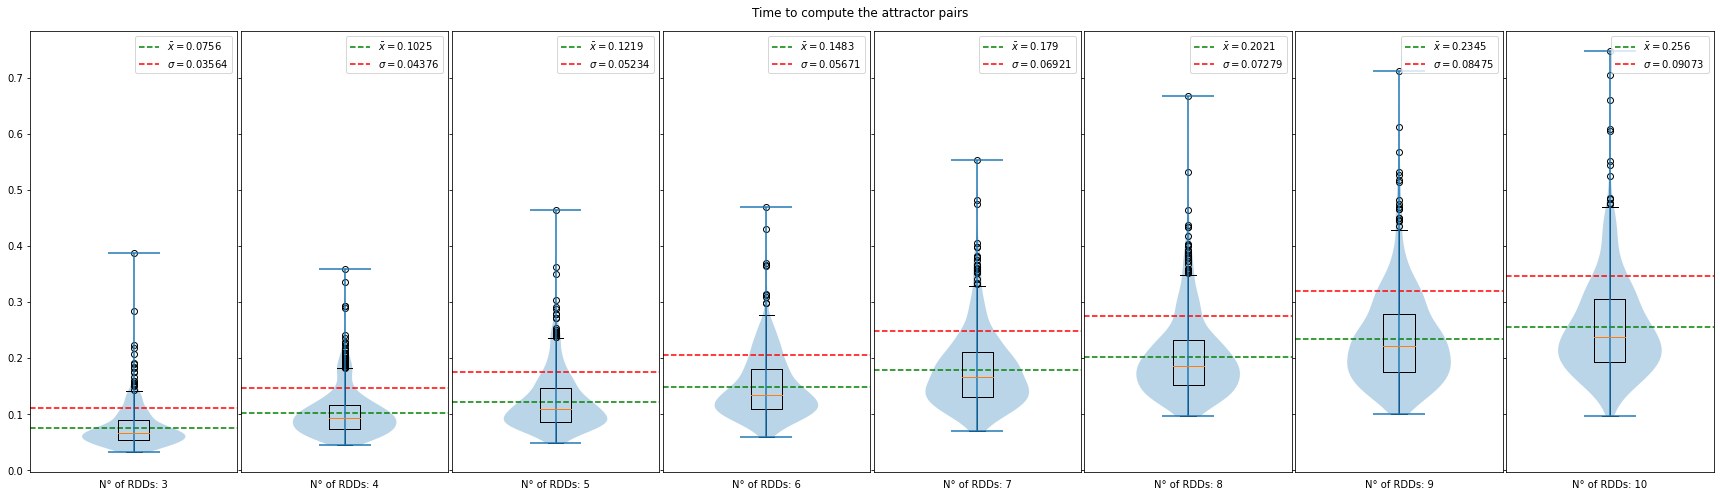

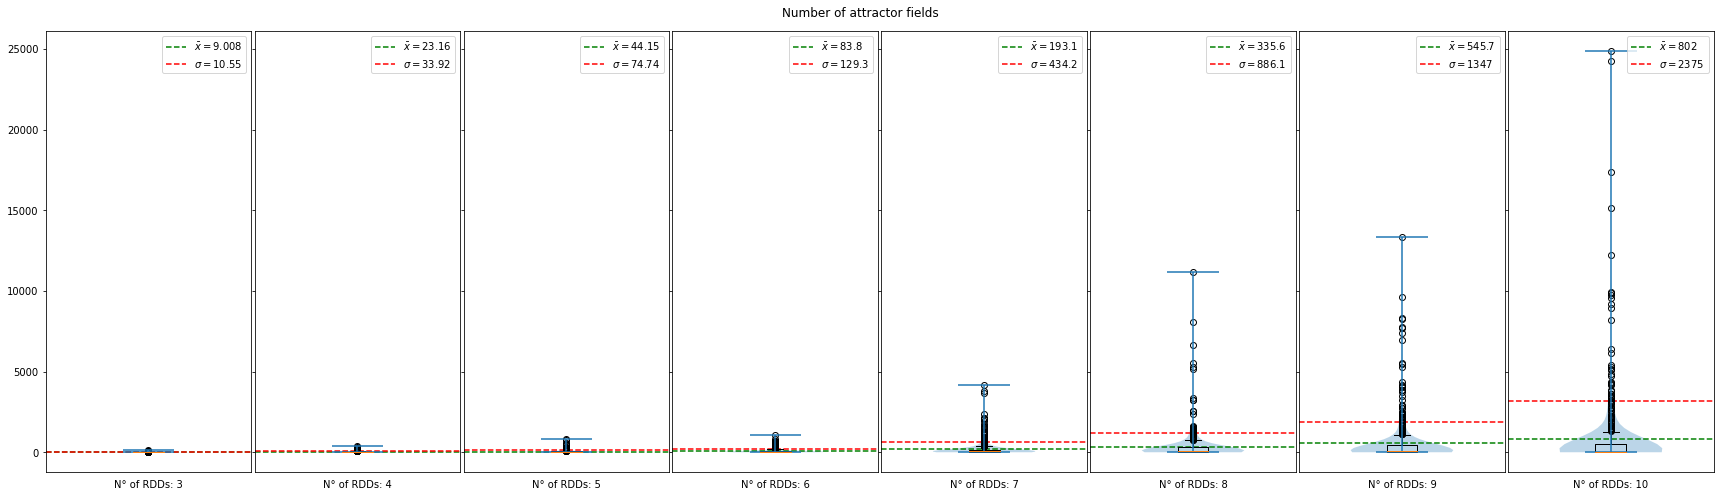

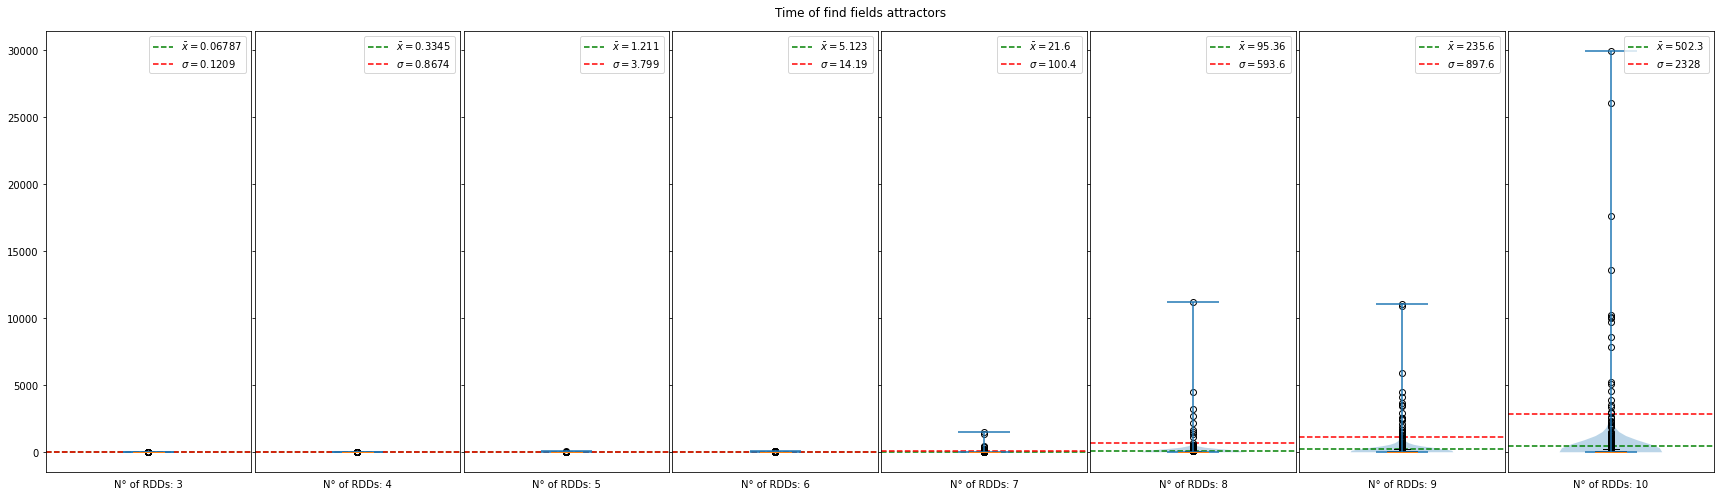

In [49]:
n_rdds = df['n_rdds'].unique()
labels = {key:label for key, label in zip(df.keys()[3:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}
log_scale = {key:label for key, label in zip(df.keys()[3:], [
          False,
          False,
          True,
          True,
          True,
          True])}
grouped = df.groupby("n_rdds")

for key in df.keys()[3:]:
    fig, axs = plt.subplots(1, n_rdds.size, figsize=(n_rdds.size*3,7), sharey=True)
    for ax, n_rdd in zip(axs, n_rdds):
        group = grouped.get_group(n_rdd)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        #std_min = ax.axhline(y=data.mean()-data.std(), xmin=0.0, xmax=1.0, color='r',ls='--')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        # if log_scale[key]:
        #     ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of RDDs: {n_rdd}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

### Pandas Dataframe to Latex

In [50]:
df.keys()

Index(['n_sample', 'n_network', 'n_rdds', 'n_rdda_attractors',
       't_find_attractors_method', 'n_pair_attractors', 't_comp_paris_method',
       'n_attractor_fields', 't_optimized_method'],
      dtype='object')

In [51]:
df_output = df[['t_find_attractors_method','n_rdda_attractors','n_pair_attractors', 't_comp_paris_method',
       'n_attractor_fields', 't_optimized_method']].mean()
df_output
df.describe()[['t_find_attractors_method','n_rdda_attractors','n_pair_attractors', 't_comp_paris_method',
       'n_attractor_fields', 't_optimized_method']]

,t_find_attractors_method,n_rdda_attractors,n_pair_attractors,t_comp_paris_method,n_attractor_fields,t_optimized_method
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1.523051,64.871000,592.633750,0.165001,254.571750,107.700921
std,0.572221,26.772048,336.353371,0.088961,1061.899696,922.098035
min,0.421370,15.000000,67.000000,0.031791,0.000000,0.010232
25%,1.036427,43.000000,343.000000,0.098518,5.000000,0.068291
50%,1.516942,64.000000,531.000000,0.148190,23.000000,0.490394
75%,1.981176,84.000000,774.250000,0.212156,109.000000,7.021806
max,3.472286,165.000000,2530.000000,0.747115,24856.000000,29935.696498


In [52]:
# print(df_output.to_latex(index=False))